# Lineer Regression:
* Q0 + Q1x
* Burada maliyet foksiyonu çizilirken x önündeki değişken değiştirilerek yapılır, yani bizim asıl verimize çizmemiz gereken lineer regression doğrusunun eğimini değiştirerek en ideal eğimi bulmaya çalışırız.
* Jargon'da Dependent değişken genelde büyük X ile gösterilir, Indipendent değişken ise küçük y ile gösterilir.
* y'yi series olarak ister çünkü bir tane, ama X'i df olarak ister çünkü multi regression ise birden fazla olabilir:
  * y = df['Exam Score']
  * X = df[['Study Hours']]

# Multi Regression:
* Q0 + Q1x1 + Q2x2 + Q3x3
* Burada çıktı birden fazla değişkene bağlıdır.
* Grafiği 3 boyutludur

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [95]:
df = pd.read_csv("1-studyhours.csv")

In [97]:
df.describe()

,Study Hours,Exam Score
count,33.000000,33.000000
mean,15.772727,74.612121
std,7.608723,18.711206
min,3.000000,40.000000
25%,9.600000,58.500000
50%,17.400000,78.800000
75%,21.300000,90.800000
max,30.000000,100.000000


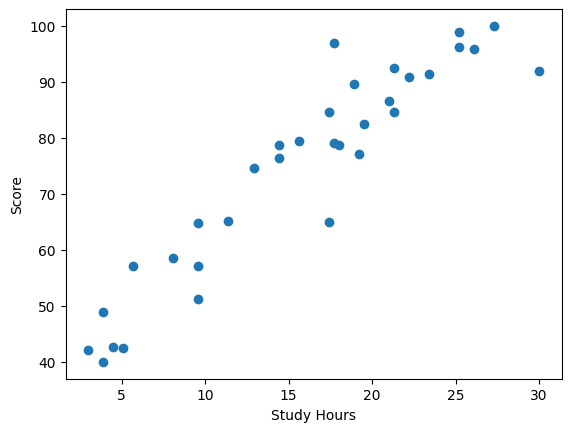

In [99]:
plt.scatter(df['Study Hours'], df['Exam Score'])
plt.xlabel('Study Hours')
plt.ylabel('Score')
plt.show()

In [101]:
# Dependent Independent Variable:
X = df[['Study Hours']]
y = df['Exam Score']

In [103]:
# Test-Train Split:
# İkiye bölmeyi kendimiz yapmayalım diye 'sklearn' bizim için bir kod oluşturmuş
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 15)
#X_test

# Standartization: sklearn.preprocessing kütüphanesi
* Yani bizim istediğimiz verileri küçültecek veya büyültecek, burada da z formülünü kullanacak.
* yani 0 ile 1 arasında koyacak
* Makine öğrenmesi algoritmalarının çoğu (özellikle: K-Means, Logistic Regression, SVM, Neural Networks) ölçekten etkilenir.
    * Örnek:
        * Özellik	Değer Aralığı
        * Boy uzunluğu	150 – 200
        * Kilo	40 – 150
        * Yaş	1 – 80
        * Bu durumda Kilo, sayısal olarak çok büyük olduğu için modelde daha baskın olur.
        * Model “kilo”ya aşırı önem verir, çünkü sayı olarak daha yüksek.
        * StandardScaler bunu önler.
* Veriyi ortalaması 0, SD’si 1 olacak şekilde dönüştürür
* Tüm özelliklerin ölçeğini eşitler
* Büyük sayılar yüzünden bazı özelliklerin modeli domine etmesini engeller
* Gradient descent → daha hızlı ve stabil çalışır
* Uzaklık tabanlı ML algoritmalarında kritik önem taşır

# Normalization
* Veri 0 ile 1 arasına sıkıştırılır
* Tüm değerler pozitif olur
* Outlier’lardan aşırı etkilenir
* Dağılımı sıkıştırır (stretch + squeeze)
* Kullanım:
    * Özellikle nöral ağlarda (image processing), mesafe tabanlı bazı modellerde ve veri görselleştirmede.

* Örnek: Küçük Bir Örnek: Boy (cm)
    * Veriniz olsun:
        * Boy (cm)
        * 150
        * 180
        * 200
    * ❗ StandardScaler çıktısı
        * Ortalama ~176 cm
        * SD ~20 cm
        * 150 → -1.3
        * 180 → 0.2
        * 200 → 1.2
        * → Değerler negatif/pozitif, ortalama 0.
    * ❗ Min-Max Normalization çıktısı
        * 150 → 0.0
        * 180 → 0.75
        * 200 → 1.0
        * → Hepsi 0–1 aralığına sıkıştırıldı.

In [106]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [108]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
#X_train

# fit_transform() ve transform() farkı:
* fit işlemi aslında o elimizdeki değerin µ ve σ değerinin hesaplanması
* transform ise bunların aşağıdaki görseldeki işlemleri uygulaması işlemidir.

  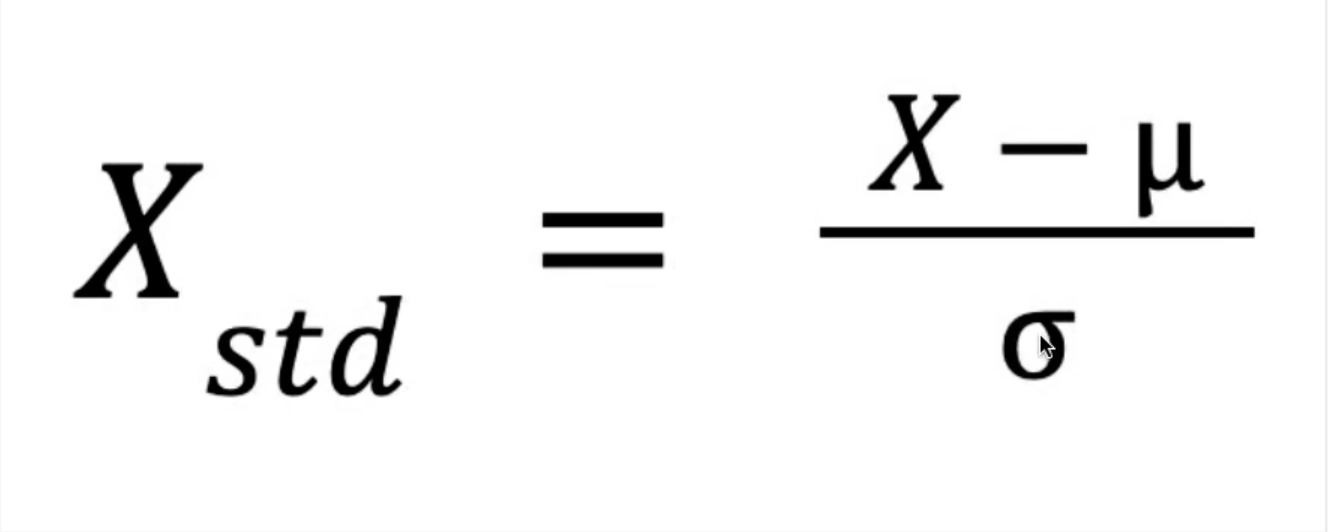

* Peki neden X_train için fit_transform yapıp, X_test için sadece transform yapıyoruz:
    * çünkü test için kullanılacak µ ve σ'nin de X_train kısmında aldığımızla aynı olması için
    * Yani aslıdna biz test kısmında model hakkında hiçbir şey bilmesini istemiyoruz
    * zaten X_test için de yapsak benzer µ ve σ elde ederiz muhtemelen ama yine de X_train üzerinden yapmamız gerekiyor
    * yani aslında burada 'data leakage' olmasını yani data sızmasını engelliyoruz

# Regression Modelini Eğitmek


In [113]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [115]:
regression.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [117]:
print('Coefficient(Q0): ', regression.coef_)
print('Intercept(Q1): ', regression.intercept_)

Coefficient(Q0):  [16.394268]
Intercept(Q1):  78.23333333333333


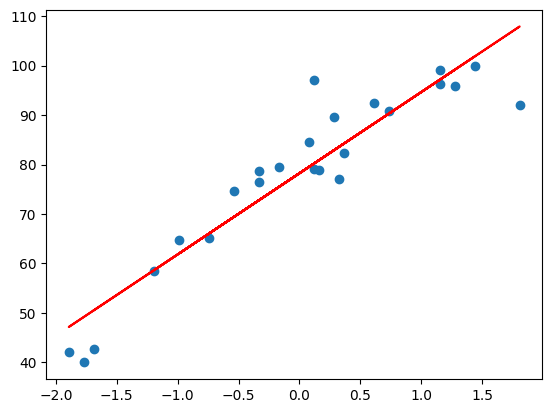

In [119]:
# y = 78.23 + 16.39x gibi bir fomksiyonumuz var artık.
# Şimdi bir grafikte de görelim:
plt.scatter(X_train, y_train)
plt.plot(X_train, regression.predict(X_train), 'r')  # 'r': red olarak versin çizgiyi demek

In [132]:
# Şimdi 20 saat çalışan bir kişinin kaç alması gerektiğini hesaplayalım:
regression.predict(scaler.transform([[20]]))
# neden scaler.transform ile 20 yazdık da direkt 20 yazmadık: çünkü biz standartization kullandık ve 20 saatin karşılığını aslında biz şu şekilde öğrenebiliriz:
print(scaler.transform([[20]])) # yani aslında benim direkt 20 değil de 0.43725517 yazmam gerekiyormuş
regression.predict([[0.4372]])

[[0.43725517]]


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([85.4009073])

# Başarı Metrikleri
* Burada iki önemli konu var. R^2 ve Adjusted R^2
*   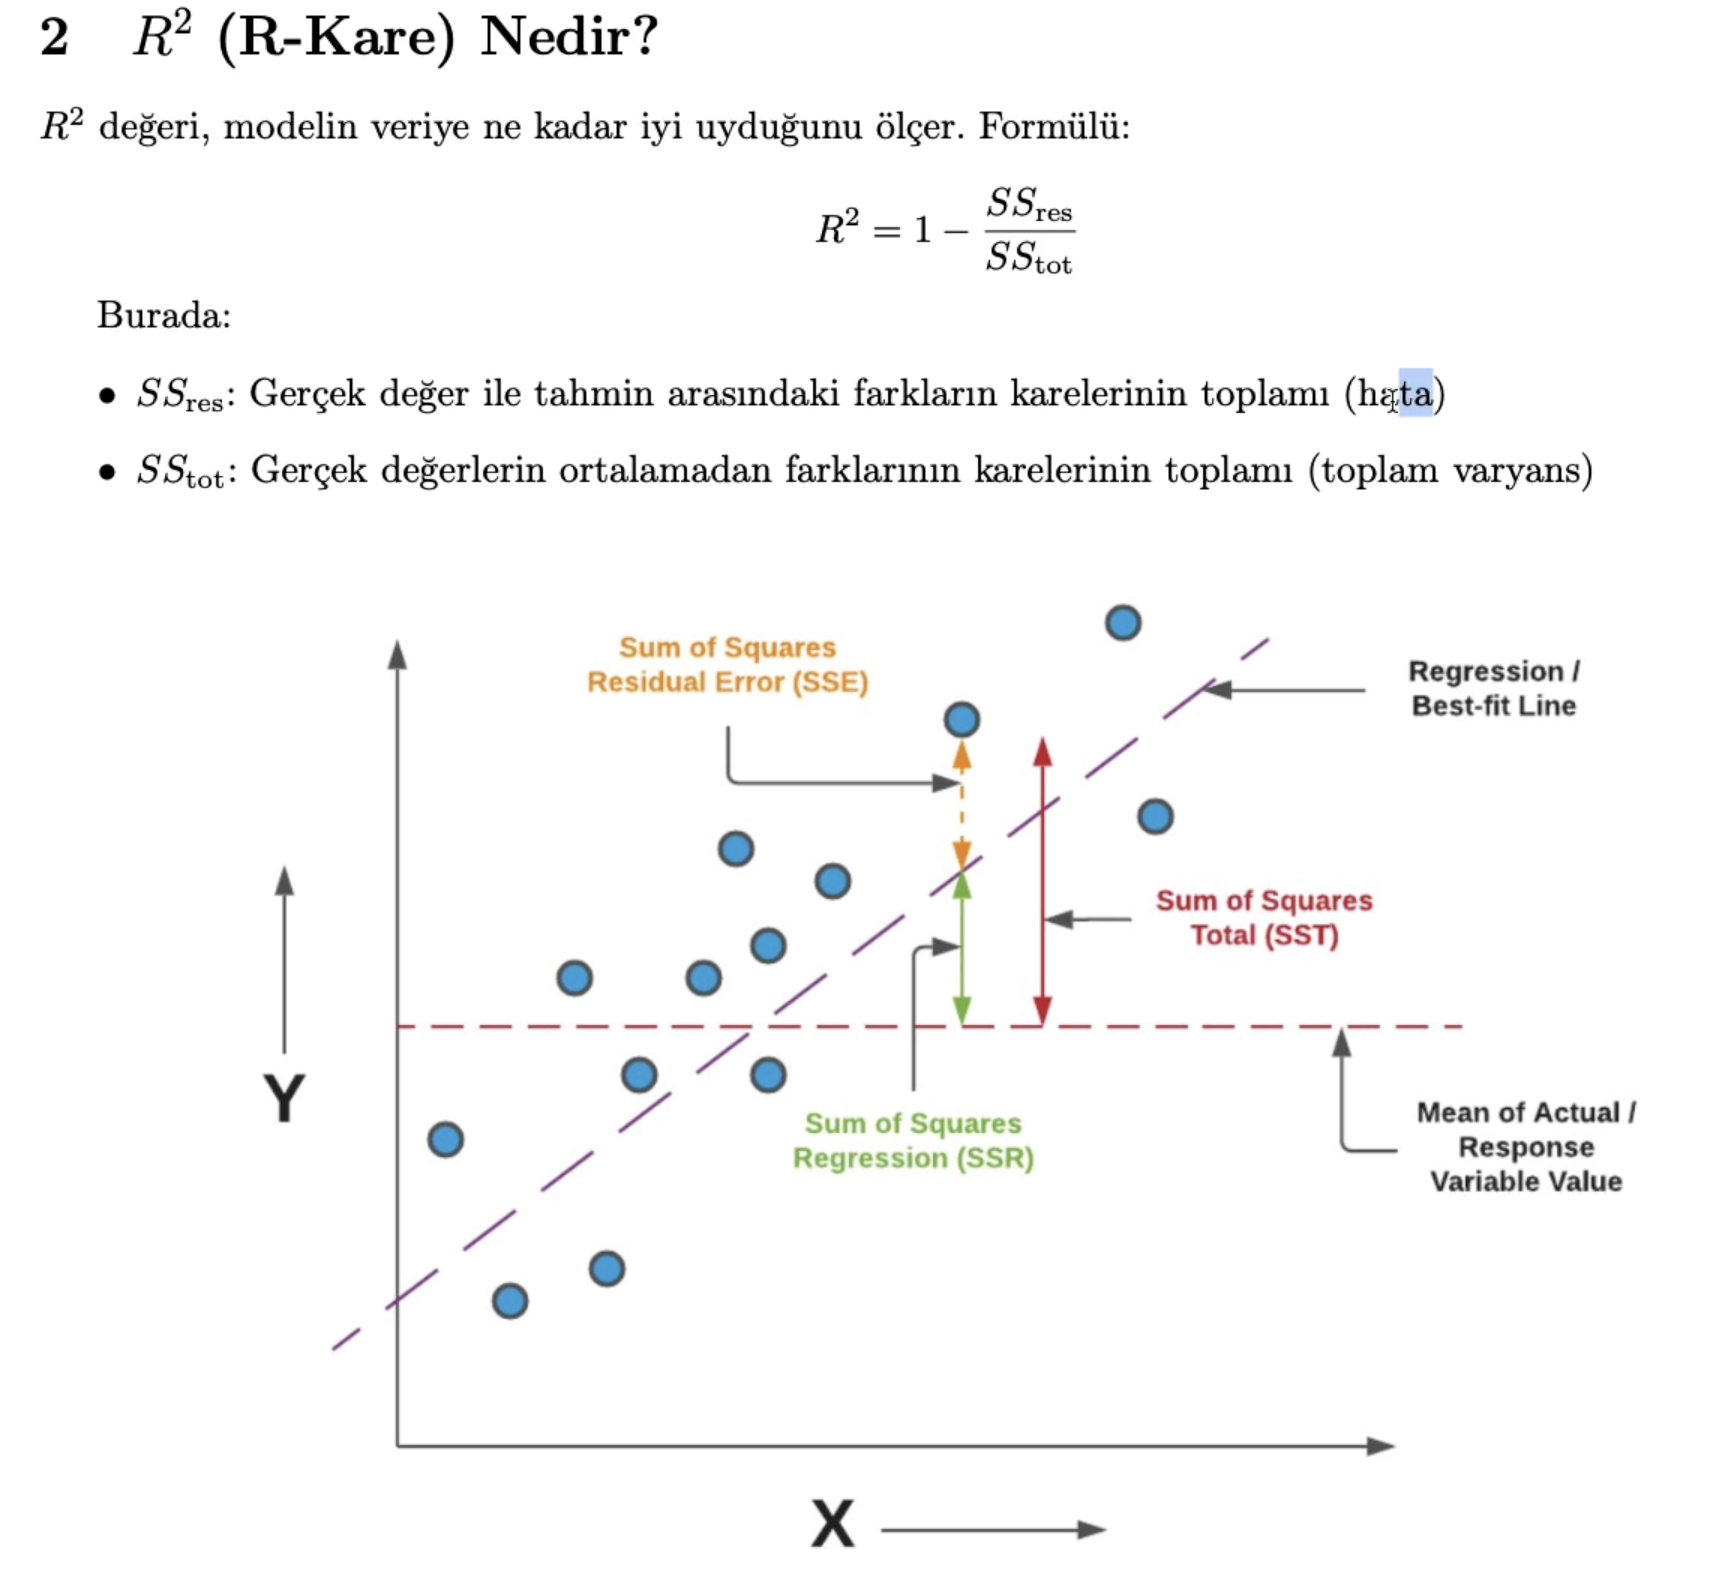
*   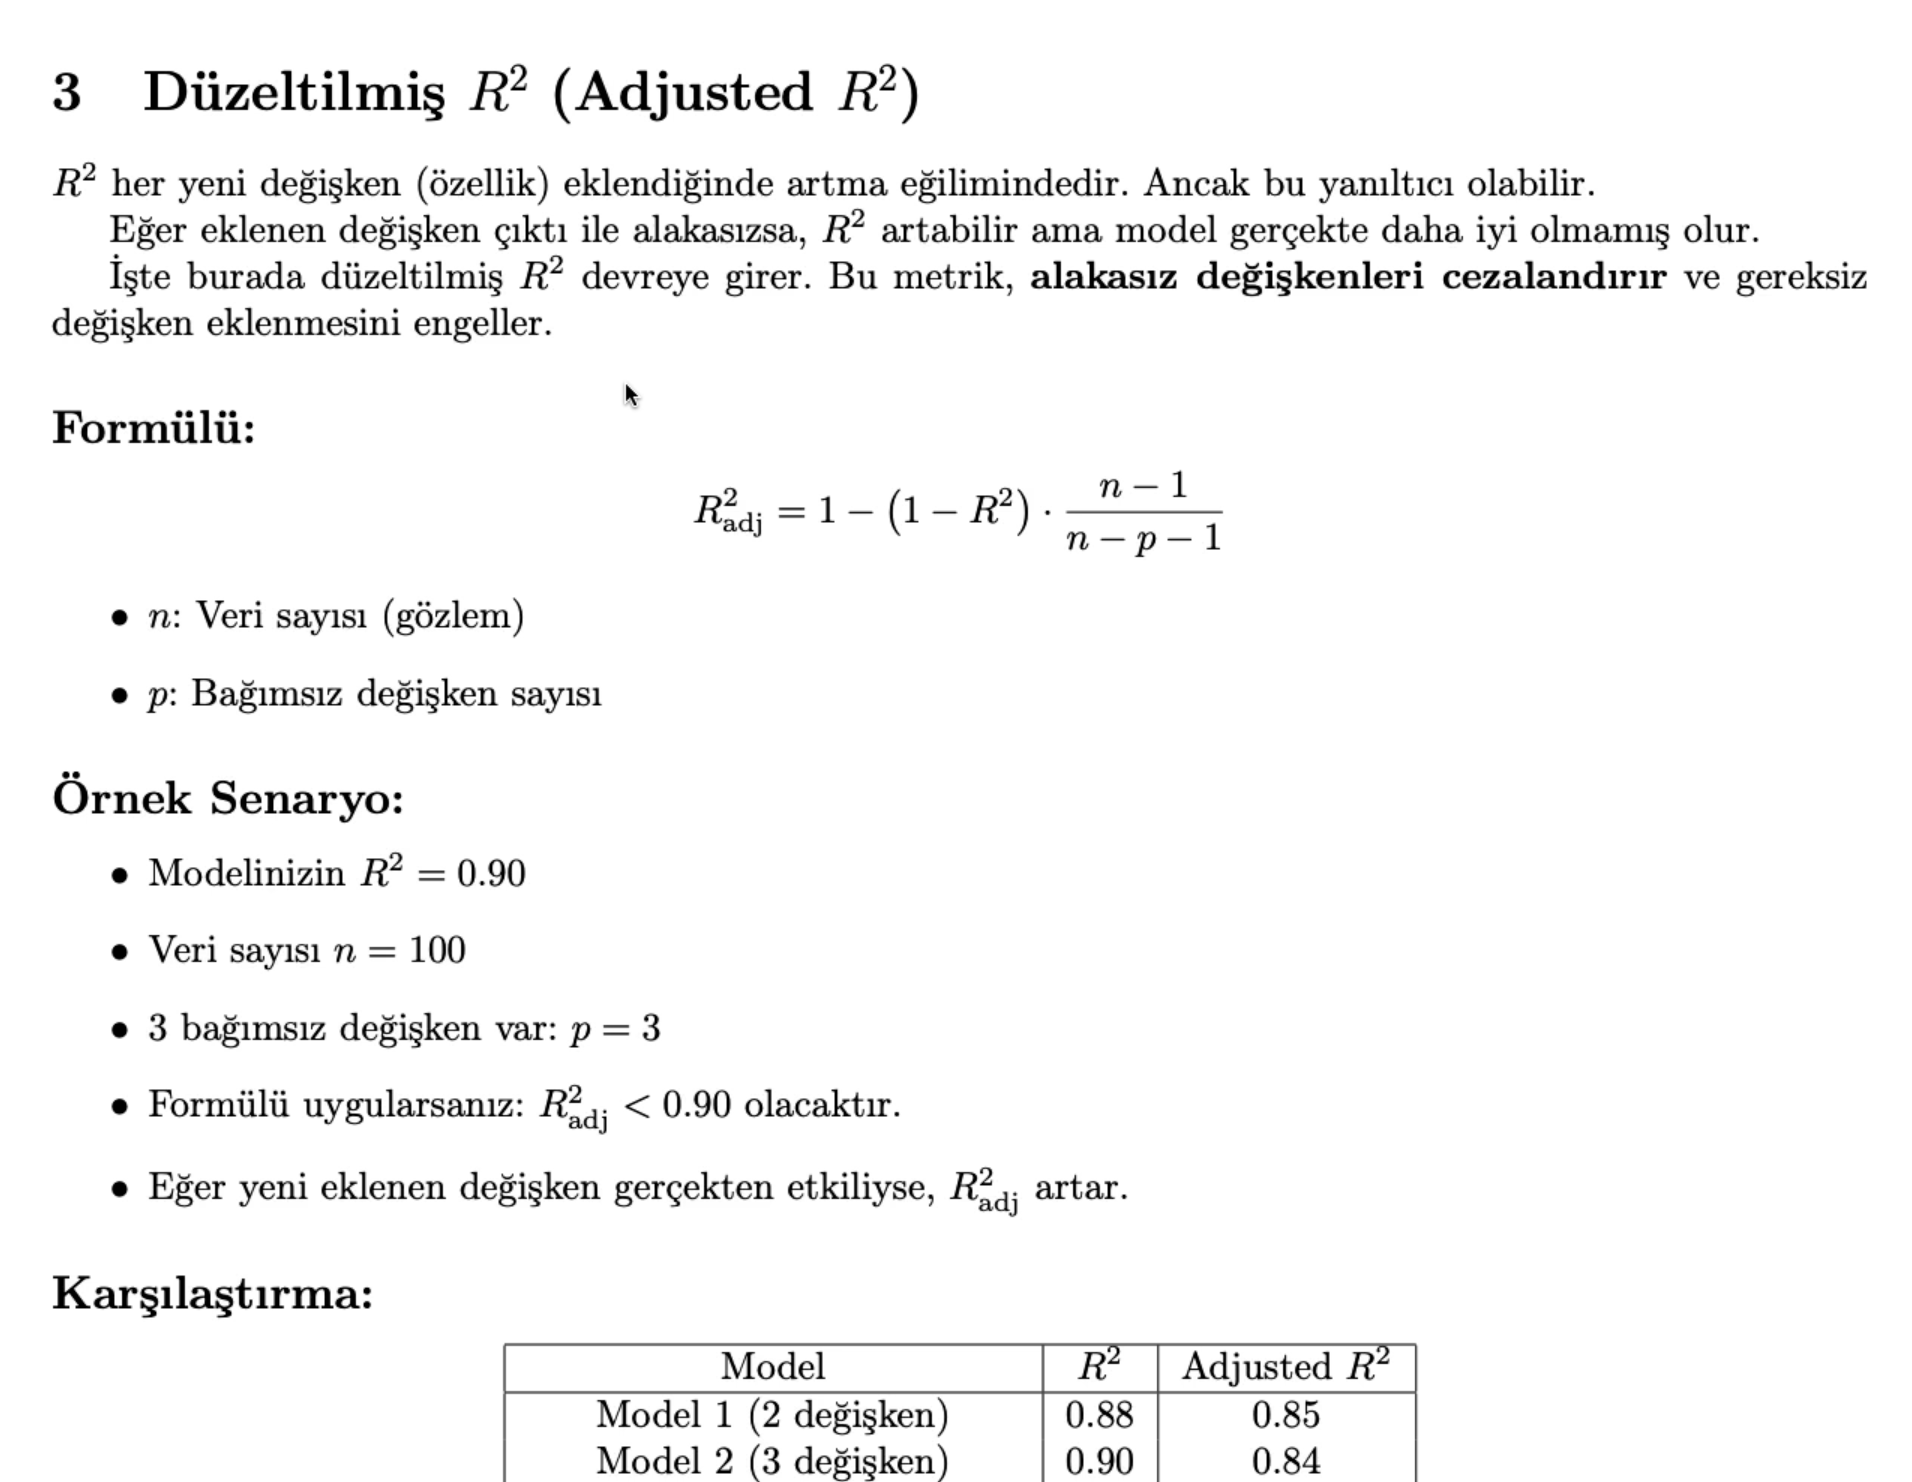
* Yani Adjusted R^2'in farkı, anlamsız değişkenlerin etkisini azaltmak, onları cezalandırır
* Mesela ikinci resmin en altına baktığımızda 2 değişken varken 3. değişken eklendiğinde R^2 88'den 90a çıkarken Adjusted R^2 85'den 84'e düşmüş.

# Hata Metrikleri
* MSE(Ortalama kare hata)
* MAE(Ortalama Mutlak hata)
* RMSE(Karekök Ortalama Kare Hata)

### MSE
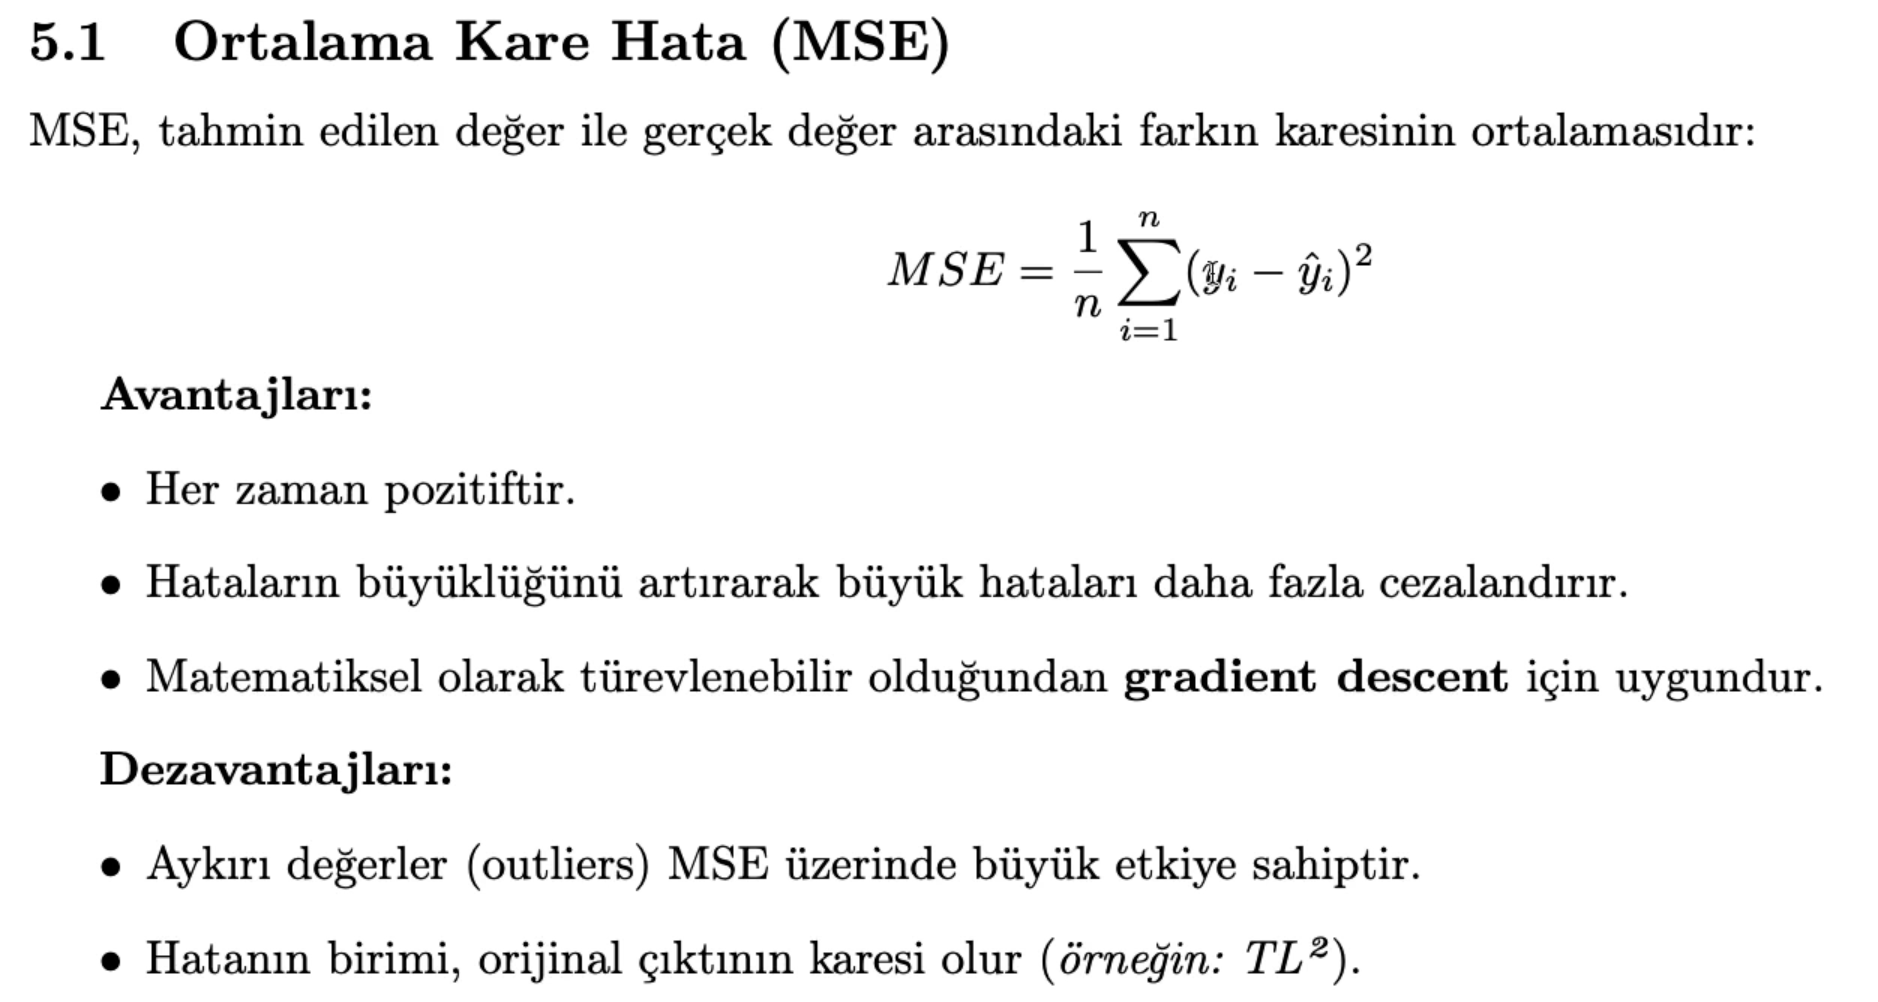

### MAE
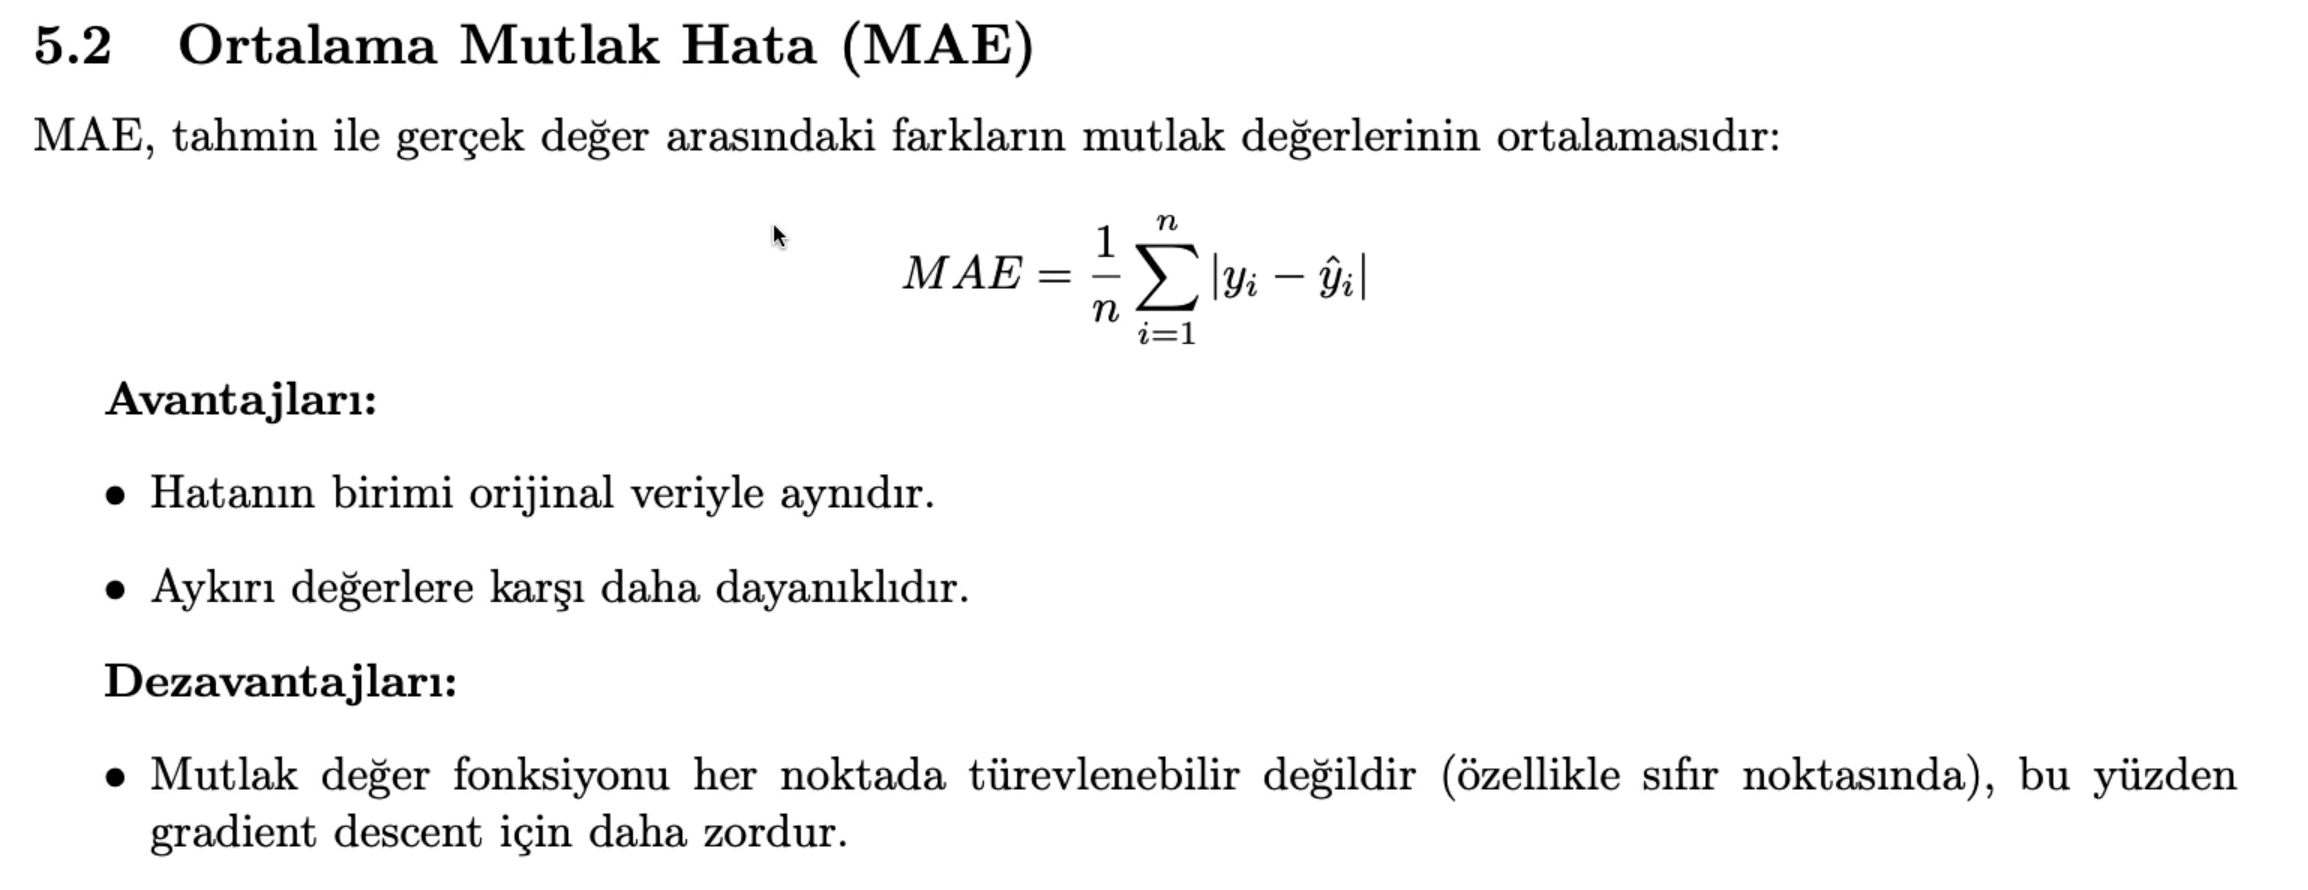

### RMSE
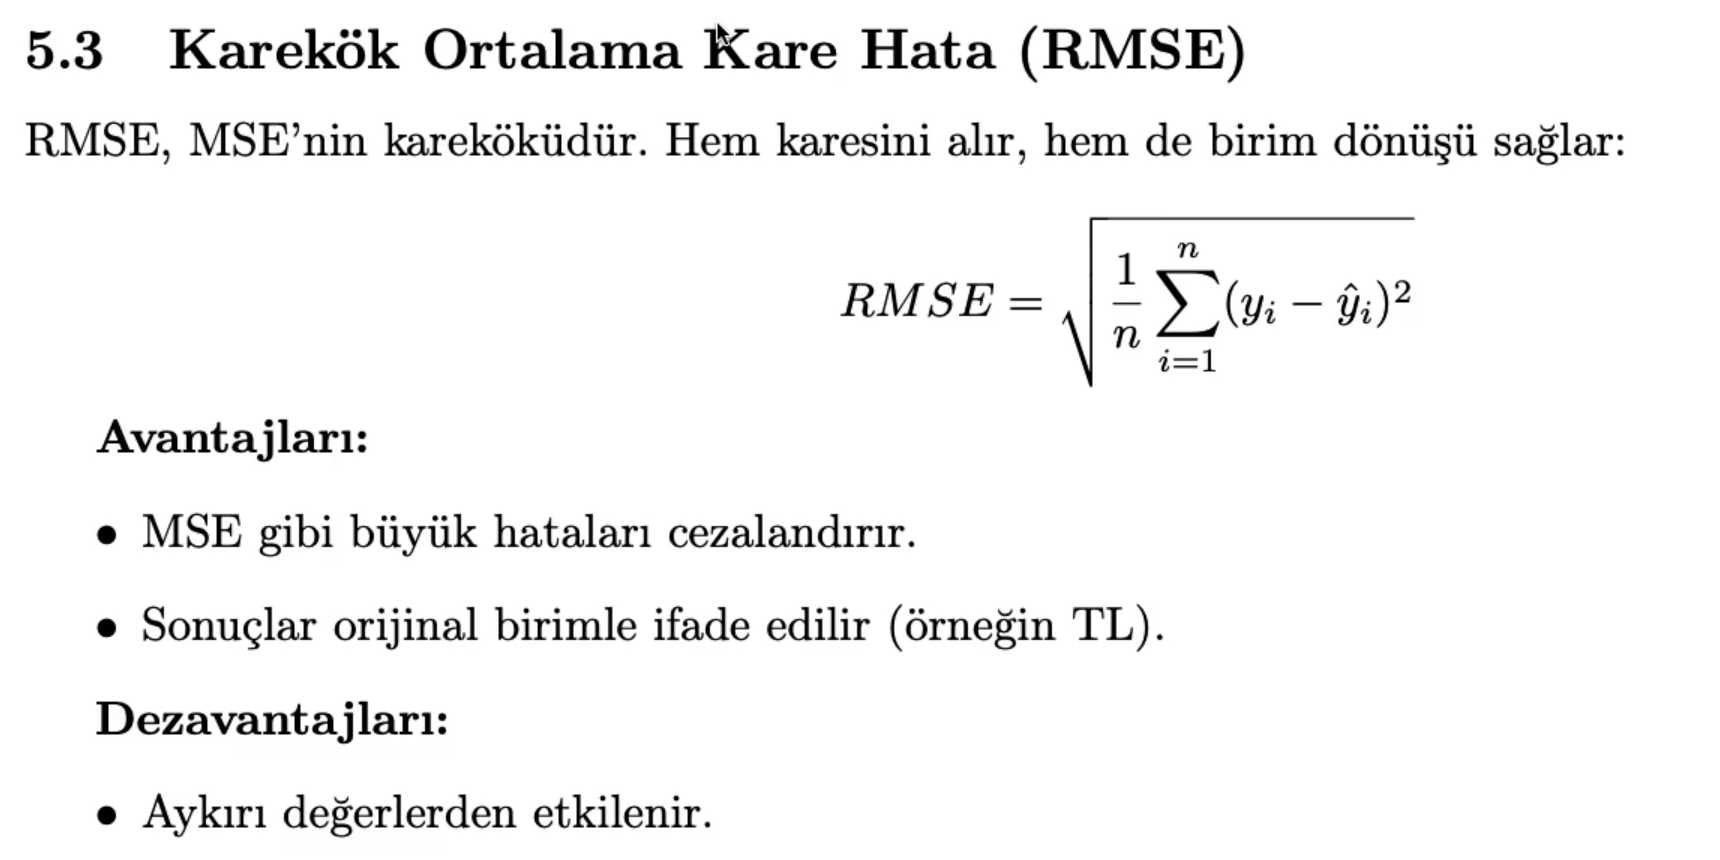




In [151]:
# Modeli test edelim, test datası ile:
predicted_y = regression.predict(X_test)
real_y = y_test

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import r2_score

#MSE:
mse = mean_squared_error(real_y, predicted_y)
#MAE
mae = mean_absolute_error(real_y, predicted_y)
#RMSE
rmse = root_mean_squared_error(real_y, predicted_y)

print('MSE: ', mse)
print('MAE: ', mae)
print('RMSE: ', rmse)

MSE:  53.14120016918231
MAE:  5.5832598751946705
RMSE:  7.289801106284198


In [155]:
# Şimdi skorumuza bakalım, yüzde kaç doğruluk var
r2 = r2_score(real_y, predicted_y)
adj_r2 = 1 - (1-r2)*(len(real_y) -1) /(len(real_y)-X_test.shape [1]-1)

print('R^2 Score: ', r2)
print('Adjusted R^2 Score: ', adj_r2)

R^2 Score:  0.8186542506722354
Adjusted R^2 Score:  0.7927477150539833
